In [35]:
import pandas as pd
import numpy as np
import json
from scipy.stats import pearsonr, spearmanr
import matplotlib as plt
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_json('./data/clean/cleaned_data.json')
title_length = df['title_word_count'].tolist()
content_length = df['content_word_count'].tolist()
theme_list = df['theme'].tolist()
frequent_word_list = df['frequent_word'].tolist()
print(title_length)
print(content_length)
print(theme_list)
print(frequent_word_list)

[17, 12, 11, 12, 12, 15, 17, 9, 13, 12, 12, 10, 9, 10, 15, 9, 11, 9, 18, 13, 11, 11, 14, 12, 16, 12, 12, 19, 16, 13, 11, 16, 11, 12, 17, 13, 11, 22, 11, 14, 21, 10, 18, 10, 13, 17, 11, 14, 15, 12, 14, 11, 15, 13, 13, 11, 14, 15, 15, 17, 14, 12, 15, 9, 21, 11, 16, 12, 14, 15, 18, 19, 15, 8, 17, 16, 13, 16, 13, 18, 11, 17, 14, 16, 22, 16, 10, 15]
[421, 336, 645, 293, 658, 667, 811, 320, 337, 522, 745, 481, 869, 373, 467, 559, 1286, 492, 391, 558, 818, 454, 739, 531, 352, 439, 343, 440, 403, 479, 613, 753, 645, 526, 1447, 675, 469, 351, 350, 430, 873, 425, 1202, 523, 1252, 421, 594, 528, 800, 323, 1466, 610, 467, 425, 847, 478, 386, 461, 1166, 644, 912, 1566, 489, 870, 746, 815, 753, 1085, 351, 713, 712, 1060, 831, 414, 789, 753, 437, 546, 505, 819, 594, 607, 1067, 1234, 351, 607, 523, 816]
['world', 'crime', 'world', 'politics', 'u.s.', 'u.s.', 'world', 'local news', 'sports', 'moneywatch', 'healthwatch', 'healthwatch', 'moneywatch', 'healthwatch', 'moneywatch', 'healthwatch', 'healthwat

In [41]:
# coefficient de corrélation de Pearson
pearson_corr, pearson_pvalue = pearsonr(title_length, content_length)
print("Corrélation de Pearson:", pearson_corr, "P-value:", pearson_pvalue)

# - Spearman
spearman_corr, spearman_pvalue = spearmanr(title_length, content_length)
print("Corrélation de Spearman:", spearman_corr, "P-value:", spearman_pvalue)

# il n'y donc presque pas de corrélation entre la longueur de résumé et la longueur de contenu des articles.

Corrélation de Pearson: 0.13274092205092128 P-value: 0.21762058787871713
Corrélation de Spearman: 0.1557474023063905 P-value: 0.14733524759919372


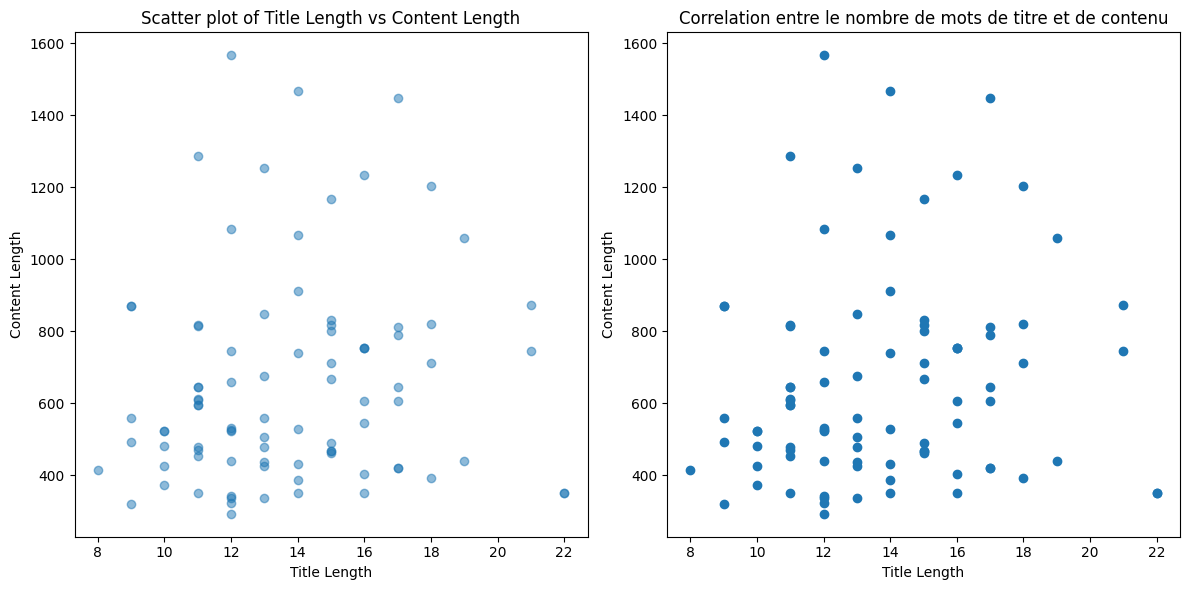

In [8]:
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(title_length, content_length, alpha=0.5)
plt.title("Scatter plot of Title Length vs Content Length")
plt.xlabel("Title Length")
plt.ylabel("Content Length")

# Correlation plot
plt.subplot(1, 2, 2)
plt.plot(title_length, content_length, 'o', label='Data points')
plt.title("Correlation entre le nombre de mots de titre et de contenu")
plt.xlabel("Title Length")
plt.ylabel("Content Length")

plt.tight_layout()
plt.savefig('./plot/correlation_titre_contenu.png')
plt.show()

In [13]:
model_path = "./bin/GoogleNews_model.bin"
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [32]:

with open('./data/clean/cleaned_data.json', 'r') as file:
    data = json.load(file)


def calculate_cosine_similarity(words1, words2):
    # former des phrases avec les mots
    sentence1 = ' '.join(words1)
    sentence2 = ' '.join(words2)
    
    # vectorization les phrases et calculer la similarité
    vectorizer = CountVectorizer().fit_transform([sentence1, sentence2])
    vectors = vectorizer.toarray()
    cosine_sim = cosine_similarity(vectors)
    
    return cosine_sim[0, 1]

similarities = []
urls = []
for article in data:
    top_3_words = article['top_3_words']
    topic = article['topic']
    similarity = calculate_cosine_similarity(top_3_words, topic)
    similarities.append(similarity)
    urls.append(article['url'])



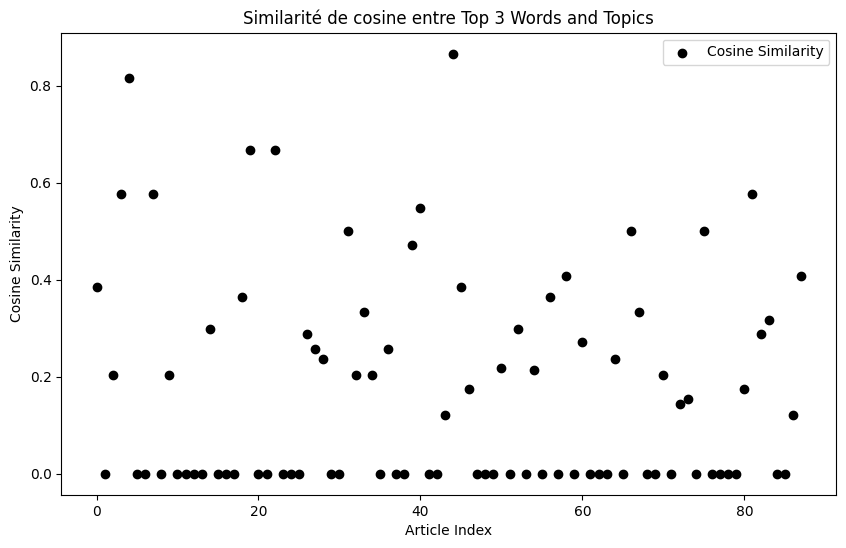

In [40]:
X = np.arange(len(similarities)).reshape(-1, 1)
y = np.array(similarities)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Cosine Similarity')
plt.xlabel('Article Index')
plt.ylabel('Cosine Similarity')
plt.title('Similarité de cosine entre Top 3 Words and Topics')
plt.legend()
plt.savefig('./plot/similarite_mots_topic.png')
plt.show()